In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

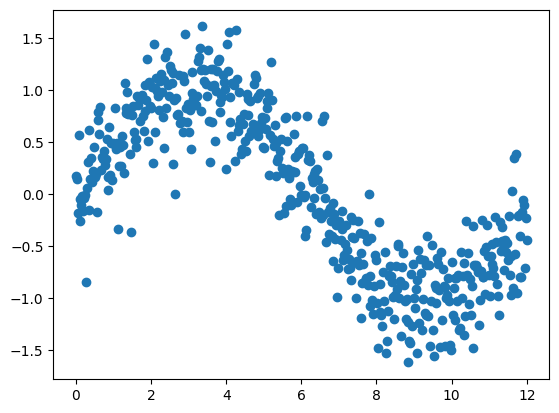

In [2]:
X = np.linspace(0, 12, 500)
y = np.sin(0.5*X) + np.random.normal(0, 0.3, X.shape)

plt.scatter(X, y);

## Kernel regression:

$$ f(x) = \sum_{i=1}^{M} \lambda_i \phi_i(x)$$
$$\phi_i(x) = \exp\big(-\epsilon (x - c_i)^2\big)$$

In [3]:
def gaussian(x, c, eps=1):
    return np.exp(-eps * (x - c)**2)

[ 0.  3.  6.  9. 12.]


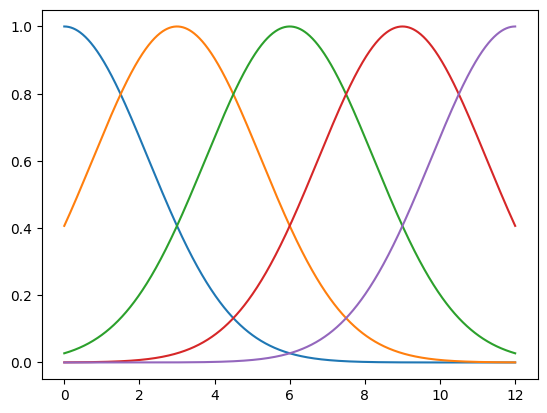

In [4]:
M = 5
eps = 0.1
centers = np.linspace(0, 12, 5)

print(centers)

x = np.linspace(0, 12, 1000)

for i in range(M):
    plt.plot(x, gaussian(x, centers[i], eps=eps));

In [5]:
Phi = np.zeros((X.shape[0], M))

In [6]:
for i in range(Phi.shape[0]):
    for j in range(Phi.shape[1]):
        Phi[i, j] = gaussian(X[i], centers[j], eps=eps)

$$\Phi \Lambda = y$$
$$\Phi^T \Phi \Lambda = \Phi^T y$$
$$\Lambda = (\Phi^T \Phi)^{-1} \Phi^T y$$

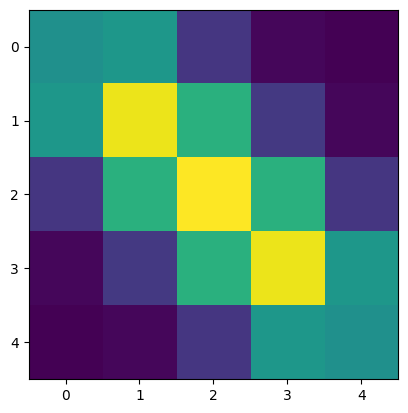

In [7]:
plt.imshow(Phi.T @ Phi);

In [8]:
L = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y

In [9]:
L

array([-0.36008067,  1.09477483,  0.21999358, -1.19053804,  0.11587277])

In [10]:
f = 0

for i in range(M):
    f += L[i] * gaussian(x, centers[i], eps=eps)

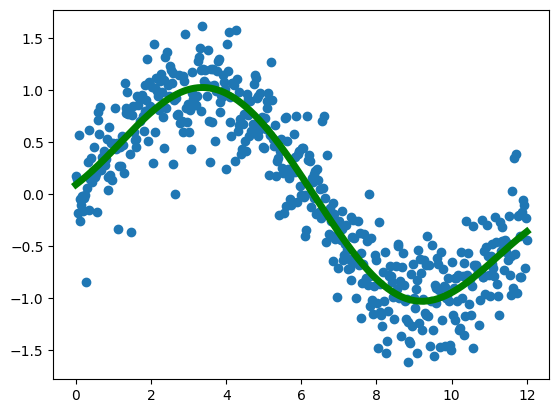

In [11]:
plt.plot(x, f, c='green', linewidth=5)

plt.scatter(X, y);

In [12]:
X.shape

(500,)

# Multi-dimensional data set:

In [24]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [93]:
X, y = make_regression(n_features=30, n_samples=10000)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

In [94]:
print(X_train.shape, y_train.shape)

(7000, 30) (7000,)


In [95]:
print(X_test.shape, y_test.shape)

(3000, 30) (3000,)


In [96]:
def gaussian(x, c, eps=1):
    return np.exp(-eps * np.linalg.norm(x - c, 2)**2)

In [118]:
M = 30
centers = [np.random.uniform(X_train.min(axis=0),
                             X_train.max(axis=0)) for i in range(M)]

In [119]:
X_train.shape

(7000, 30)

In [120]:
eps=0.01
Phi = np.zeros((X_train.shape[0], M))

for i in range(Phi.shape[0]):
    for j in range(Phi.shape[1]):
        Phi[i, j] = gaussian(X_train[i, :], centers[j], eps=eps)

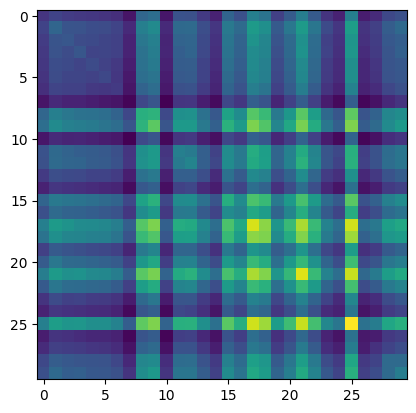

In [121]:
plt.imshow(Phi.T @ Phi);

In [122]:
L = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y_train

In [123]:
y_pred = []

for i in range(X_test.shape[0]):

    f = 0
    for j in range(L.shape[0]):
        f += L[j] * gaussian(X_test[i, :], centers[j], eps=eps)
        
    y_pred.append(f)

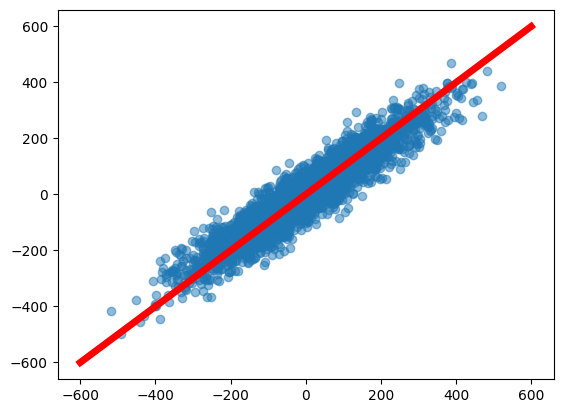

In [124]:
plt.scatter(x=y_test, y=y_pred, alpha=0.5)
plt.plot(np.linspace(-600, 600, 100), 
         np.linspace(-600, 600, 100), 
         c='red', linewidth=5);

#  Metrics:

$$Max ERR = \max_i |y_i - \hat{y}_i|,$$

$$MAE = \frac{1}{n_{sample}} \sum_{i=1}^{n_{sample}} |y_i - \hat{y}_i|$$

$$MSE = \frac{1}{n_{sample}} \sum_{i=1}^{n_{sample}} (y_i - \hat{y}_i)^2$$

$$RMSE = \sqrt{\frac{1}{n_{sample}} \sum_{i=1}^{n_{sample}} (y_i - \hat{y}_i)^2}$$

$$R^2 = 1 - \frac{ \sum_{i=1}^{n_{sample}} (y_i - \hat{y}_i)^2}{ \sum_{i=1}^{n_{sample}} (y_i - \bar{y}_i)^2}$$



In [125]:
from sklearn.metrics import max_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import r2_score

In [126]:
max_error(y_true=y_test, y_pred=y_pred)

189.9235739260921

In [127]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

41.07697320313796

In [128]:
mean_squared_error(y_true=y_test, y_pred=y_pred)

2722.812078069602

In [129]:
root_mean_squared_error(y_true=y_test, y_pred=y_pred)

52.18057184498463

In [130]:
r2_score(y_true=y_test, y_pred=y_pred)

0.8847083199061027

## Further reading:

- [Pattern recognition and machine learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)

- [Scattered Data Approximation](https://www.cambridge.org/core/books/scattered-data-approximation/980EEC9DBC4CAA711D089187818135E3)

- [Scattered data interpolation: Strictly positive definite radial basis/cardinal functions](https://www.sciencedirect.com/science/article/pii/S0377042721002004)